<a href="https://colab.research.google.com/github/PaulToronto/Howard-University-Coursera-Linear-Algebra-For-Data-Science-Specialization/blob/main/1_4_1_Real_World_Applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.4.1 Real World Applications

### Imports

In [1]:
import seaborn as sns
import pandas as pd
import sympy as sym
import numpy as np

import matplotlib.pyplot as plt

## 1.4.1.1 Introduction to a Sample Data Set

### Titanic Data Set

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
type(titanic)

pandas.core.frame.DataFrame

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
titanic['survived'].value_counts(dropna=False)

0    549
1    342
Name: survived, dtype: int64

In [8]:
titanic['survived'].value_counts(normalize=True, dropna=False)

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 1.4.1.2 Working through a Sample Data Set Using Vector Equations: Part 1

This lesson covers using the **least square error method** to find a normal equation.

### Least Square Error Method

- **Least square linear equations** is a method that will minimize the sum of the square of errors
- Those errors are resulting from the regression $Y$ to estimate the true data point $y$.
- This is, $\sum_{1}^{n}\left[y_i - Y_i\right]^2$, where $e_i = y_i - Y_i$ is the error when we approximate the true data point, $y_i$ with our model, $Y_i$

### Deriving the Normal Equation

- Suppose that there is no solution to $Y = AX$.
- We can find an approximate soljutin $X^*$ such that $|Y - AX^*|$ is minimized.
- Since the shortest distance betweetn $Y$ and $AX^*$ is the projection of $Y$ onto the $A$ space, it follows that $AX^* = Proj_{A}^{Y}$
- Subtracting $Y$ from both sides:

$$
AX^{*} - Y = Proj_{A}^{Y} - Y
$$

- Hence, $AX^{*} - Y$ is the normal complement of $A$
- As a result:

$$
A^{T}\left(AX^{*} - Y\right) = 0
$$

- We want to solve for $X^{*}$:

$$
\begin{align}
A^{T}\left(AX^{*} - Y\right) &= 0 \\
A^{T}AX^{*} &= A^{T}Y
\end{align}
$$

- Multiply both sides by $\left(A^{T}A\right)^{-1}$

$$
X^{*} = \left(A^{T}A\right)^{-1}A^{T}Y
$$

This is called the **normal equation** and $X^{*}$ is the approximate solution.

## 1.4.1.3 Working through a Sample Data Set Using Vector Equations: Part 2

In this lesson we use the **normal equation** to solve a linear equation model.

- In a coffee shop, consumers are willing to buy 200 frappuccinos per hour at a unit price of 4 dollars
- Use the `frappuccino.csv` data to predict the demand for frappucinos per hour from the coffee shop when it sells them at a unit price of 6 dollars

### The Data

In [10]:
path = 'https://raw.githubusercontent.com/PaulToronto/'
path += 'Howard-University-Coursera-Linear_Algebra-For-Data-Science-Specialization/'
path += 'main/data/frappuccino.csv'

frapp = pd.read_csv(path, index_col=0)

In [11]:
frapp

,Demand,Price
0,200,4.2
1,192,4.8
2,188,5.0
3,184,5.2
4,180,5.5


### Equations

- Normal Equation

$$
X^{*} = \left(A^{T}A\right)^{-1}A^{T}Y
$$

- Sum of Squared Error

$$
SSE = E^TE
$$

### Solution

In [12]:
A = sym.Matrix(frapp['Price'])
A = A.col_insert(0, sym.ones(len(frapp), 1))
A

Matrix([
[1, 4.2],
[1, 4.8],
[1, 5.0],
[1, 5.2],
[1, 5.5]])

In [13]:
y = sym.Matrix(frapp['Demand'])
y

Matrix([
[200],
[192],
[188],
[184],
[180]])

In [14]:
X =(A.T * A).inv() * A.T * y
X

Matrix([
[266.428571428573],
[-15.714285714285]])

In [15]:
Y = A * X
Y # these are the predictions from our model

Matrix([
[200.428571428576],
[191.000000000005],
[187.857142857148],
[184.714285714291],
[180.000000000006]])

In [16]:
sym.Matrix(1, 2, [1, 6]) * X

Matrix([[172.142857142863]])

In [17]:
SSE = (y - Y).T.dot(y - Y)
SSE

1.71428571428571

In [18]:
sse = 0
for i in range(len(y)):
    sse += (y[i] - Y[i])**2

sse

1.71428571428571

With a unit price of $6, the coffee shop with sell 172 frappuccinos.

### Using `sklearn` to get the answer

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
X_train = frapp[['Price']]
y_train = frapp['Demand']
model.fit(X_train, y_train)
model.intercept_, model.coef_[0]

(266.42857142857144, -15.714285714285717)

In [20]:
model.predict(X_train)

array([200.42857143, 191.        , 187.85714286, 184.71428571,
       180.        ])

In [21]:
model.predict(np.array([[6]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([172.14285714])

In [22]:
sse2 = mean_squared_error(y_train, model.predict(X_train)) * len(y_train)
sse2

1.7142857142857388

## 1.4.1.4 Real-World Applications - Ice Cream Sales

### The Data

In [23]:
path = 'https://raw.githubusercontent.com/PaulToronto/'
path += 'Howard-University-Coursera-Linear_Algebra-For-Data-Science-Specialization/'
path += 'main/data/icecreamsales.csv'

icecream = pd.read_csv(path)

In [24]:
icecream

,Temperature,Sales
0,37,292
1,40,228
2,49,324
3,61,376
4,72,440
5,79,496
6,83,536
7,81,556
8,75,496
9,64,412


In [25]:
X = sym.Matrix(icecream['Temperature'])
X = X.col_insert(0, sym.ones(len(icecream), 1))
X

Matrix([
[1, 37],
[1, 40],
[1, 49],
[1, 61],
[1, 72],
[1, 79],
[1, 83],
[1, 81],
[1, 75],
[1, 64],
[1, 53],
[1, 40]])

In [26]:
y = sym.Matrix(icecream['Sales'])
y

Matrix([
[292],
[228],
[324],
[376],
[440],
[496],
[536],
[556],
[496],
[412],
[324],
[320]])

### Equations

- Normal Equation
- The variable names have changed since the previous lecture, so I've changed them here

$$
A = \left(X^{T}X\right)^{-1}X^{T}y
$$

- Sum of Squared Error

$$
SSE = E^TE
$$

In [27]:
A = (X.T * X).inv() * X.T * y
A

Matrix([
[341356/9599],
[ 57192/9599]])

In [28]:
b = A[0]
m = A[1]
b, m

(341356/9599, 57192/9599)

In [29]:
X * A # our predictions

Matrix([
[   84740/331],
[2629036/9599],
[3143764/9599],
[3830068/9599],
[4459180/9599],
[4859524/9599],
[5088292/9599],
[4973908/9599],
[4630756/9599],
[4001644/9599],
[3372532/9599],
[2629036/9599]])

In [30]:
# the sklearn answer
model = LinearRegression()
X_train = icecream[['Temperature']]
y_train = icecream['Sales']
model.fit(X_train, y_train)
model.intercept_, model.coef_[0]

(35.56162100218768, 5.958120637566414)

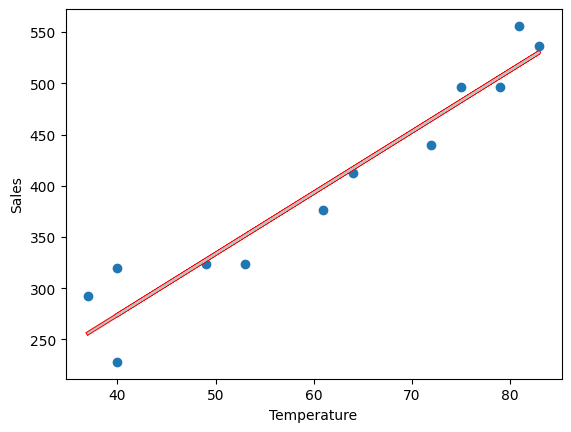

In [31]:
plt.scatter(X[:, 1], y)
plt.xlabel('Temperature')
plt.ylabel('Sales')
# regression line
plt.plot(X[:, 1], X * A, c='red', linewidth=3)
# sklearn regression line
plt.plot(X_train, X_train * model.coef_[0] + model.intercept_, c='silver')
plt.show()

Predict Sales when the temperature is 92.

In [32]:
Y_pred = lambda x: m * x + b

In [33]:
Y_pred(92)

5603020/9599

In [34]:
model.predict(np.array([[92]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([583.70871966])

In [35]:
Y_pred(92).evalf()

583.708719658298

In [36]:
Y = X * A
SSE = (y - Y).T.dot(y - Y)
SSE

88295328/9599

In [37]:
SSE.evalf()

9198.38816543390

In [38]:
SSE.evalf()

9198.38816543390

In [39]:
mean_squared_error(y_train, model.predict(X_train)) * len(y_train)

9198.388165433902

## 1.4.1.5 Practice Quiz

In [40]:
mpg = sns.load_dataset('mpg')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [41]:
mpg.groupby('origin').sum()

<ipython-input-41-a10574abbb62>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mpg.groupby('origin').sum()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
origin,,,,,,,
europe,1952.4,291,7640.0,5478.0,169631,1175.1,5307
japan,2405.6,324,8114.0,6307.0,175477,1277.6,6118
usa,5000.8,1556,61229.5,29167.0,837121,3743.4,18827


In [42]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [43]:
mpg.drop('mpg', axis=1)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,4,120.0,79.0,2625,18.6,82,usa,ford ranger
